# Can the WHAV* diagram be used to distinguish shocks from other sources of excitation?
---

In this notebook, we aim to show whether or not the WHAV* diagram can be used to distinguish shocks from other power sources.

We will start by looking at **GAMA 209807**, which has already been confirmed to host shocks by Ho et al. (2014). The justification that the 2nd and 3rd components represent shocks were are as follows:
* the line ratios in these components is composite or LINER-like.
* these components were distributed around the galaxy with no central concentration, indicating that they are not a result of an AGN.
* there is a correlation between line width and forbidden line ratios including N2 and S2.
* the line ratios (and velocity dispersion) lie on top of MAPPINGS IV shock models.

In this Notebook,
1. We will first show that the SAMI DR3 data reproduces these results, by making
    * BPT diagrams.
    * plots showing $\sigma$ vs. N2, S2 etc.
2. We will then apply the WHAV* diagram to this object, and see where the "shocked" components lie. 
    * first, make a plot showing $\Delta \sigma$ vs. N2, S2 to show that the correlation still occurs.
    * then, show the WHAV* diagram, and comment on where the spaxels lie.
3. Then, apply the WHAV* diagram to other sources. 
    * find SAMI galaxies in our subsample that have spaxels lying in the upper-right quadrant of the WHAV* diagram. Do these galaxies exhibit evidence for shocks? e.g., high SFRs, or AGN, or mergers? Make BPT diagrams for these objects.

In [13]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist
from tqdm import tqdm

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxies
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import component_colours
from spaxelsleuth.plotting.plotgrids import plot_grids
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 16})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
sami_data_path = "/priv/meggs3/u5708159/SAMI/sami_dr3"
fig_path = "/priv/meggs3/u5708159/SAMI/figs/individual_plots/"
savefigs = True
eline_SNR_min = 3


In [3]:
# For plotting
markers = ["o", ">", "D"]


In [4]:
# Load the SAMI sample
df_sami = load_sami_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=eline_SNR_min, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)



/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [5]:
# Also load the 1-component fit for comparison
df_sami_1comp = load_sami_galaxies(ncomponents="1",
                             bin_type="default",
                             eline_SNR_min=eline_SNR_min, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)


In [6]:
# Load the LZIFU data for 209807
gal = 209807
df_gal = load_lzifu_galaxies(gal=gal, 
                             ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=eline_SNR_min, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)


Loading LZIFU DataFrame for galaxy 209807...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
# Also load the 1-component fit for 209807
df_gal_1comp = df_sami_1comp[df_sami_1comp["catid"] == gal]

## Velocity dispersion distribution
---

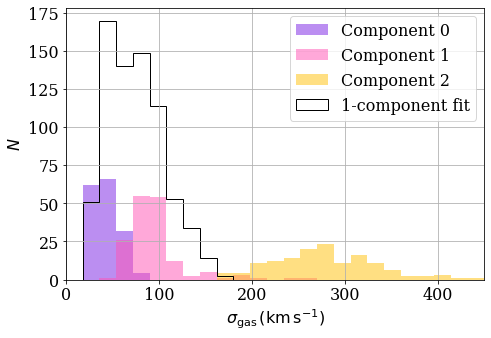

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5))

# Recommended-component fit
for ii in range(3):
    ax.hist(df_gal[f"sigma_gas (component {ii})"], histtype="stepfilled", range=(0, 450), bins=25, 
            color=component_colours[ii], alpha=0.5,
            label=f"Component {ii}")
    
# 1-component fit
ax.hist(df_gal_1comp["sigma_gas (component 0)"], histtype="step", range=(0, 450), bins=25,
        color="k",
        label="1-component fit")
ax.legend()
ax.set_xlabel(label_fn("sigma_gas"))
ax.set_ylabel("$N$")
ax.grid()
ax.autoscale(enable=True, tight=True, axis="x")

## BPT diagrams
----

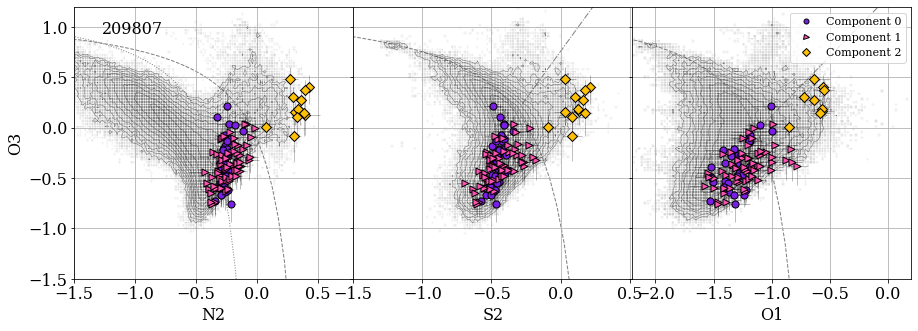

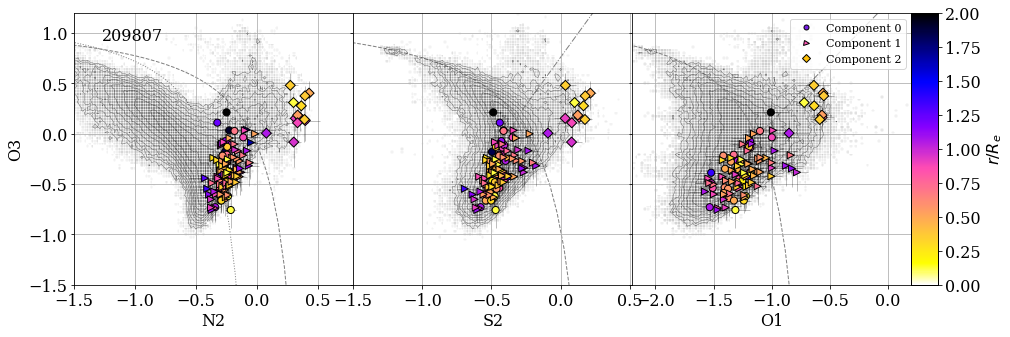

In [18]:
for col_z in ["Number of components", "r/R_e"]:

    # Create a new figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.subplots_adjust(wspace=0)
    if col_z != "Number of components":
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])

    # Plot BPT diagram
    col_y = "log O3"
    axs[0].text(s=gal, x=0.1, y=0.9, transform=axs[0].transAxes)
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        # Plot full SAMI sample
        plot2dhistcontours(df=df_sami, 
                           col_x=f"{col_x} (total)",
                           col_y=f"{col_y} (total)", col_z="count", log_z=True,
                           alpha=0.5, cmap="gray_r",
                           ax=axs[cc], plot_colorbar=False)

        # Add BPT functions
        plot_BPT_lines(ax=axs[cc], col_x=col_x)    

        # Plot LZIFU measurements
        for ii in range(3):
            plot2dscatter(df=df_gal,
                          col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=None if col_z == "Number of components" else col_z,
                          marker=markers[ii], ax=axs[cc], 
                          markersize=50, 
                          markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                          markeredgecolor="black",
                          cax=cax if ii == 2 and col_z != "Number of components" else None,
                          plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

        # axis limits
        axs[cc].set_xlim(
            [np.nanmin([vmin_fn(col_x), 
                       np.nanmin([df_gal[f"{col_x} (component 0)"].min(), 
                                  df_gal[f"{col_x} (component 1)"].min(), 
                                  df_gal[f"{col_x} (component 2)"].min()]) - 0.1]),
             np.nanmax([vmax_fn(col_x), 
                       np.nanmax([df_gal[f"{col_x} (component 0)"].max(), 
                                  df_gal[f"{col_x} (component 1)"].max(), 
                                  df_gal[f"{col_x} (component 2)"].max()]) + 0.1])])
        # axis limits
        axs[cc].set_ylim(
            [np.nanmin([vmin_fn(col_y), 
                       np.nanmin([df_gal[f"{col_y} (component 0)"].min(), 
                                  df_gal[f"{col_y} (component 1)"].min(), 
                                  df_gal[f"{col_y} (component 2)"].min()]) - 0.1]),
             np.nanmax([vmax_fn(col_y), 
                       np.nanmax([df_gal[f"{col_y} (component 0)"].max(), 
                                  df_gal[f"{col_y} (component 1)"].max(), 
                                  df_gal[f"{col_y} (component 2)"].max()]) + 0.1])])
        
        # overlay shock grids
#         plot_grids(grid="shock", shock_model_type="shock",
#                    col_x=col_x, col_y=col_y, 
#                    legend=True if cc == 2 else False, ax=axs[cc])

    # Decorations
    [ax.grid() for ax in axs]
    [ax.set_ylabel("") for ax in axs[1:]]
    [ax.set_yticklabels([]) for ax in axs[1:]]
    [ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs[:-1]]
    [ax.collections[0].set_rasterized(True) for ax in axs]
    
    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    axs[-1].legend(handles=legend_elements, fontsize="x-small", loc="upper right")


## WHAN diagram
---

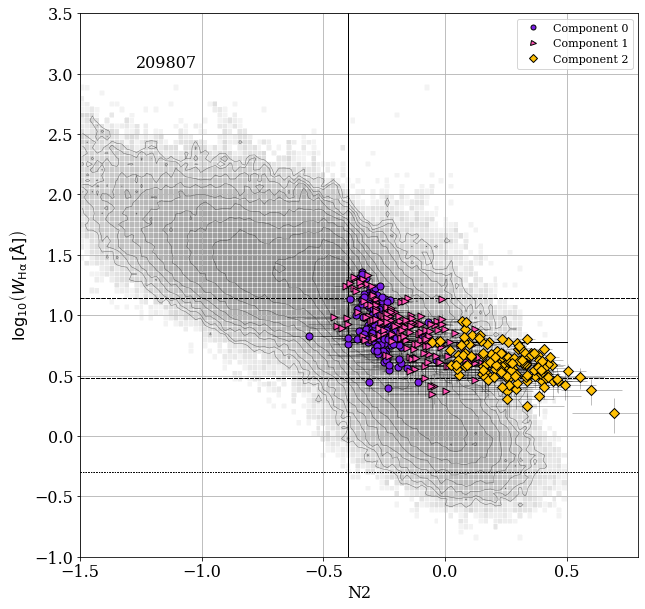

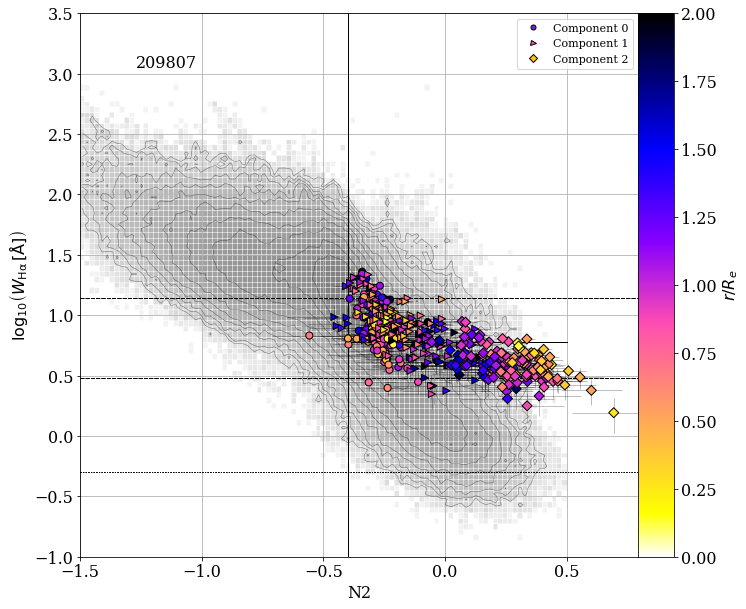

In [20]:
col_y = "log HALPHA EW"
col_x = "log N2"

for col_z in ["Number of components", "r/R_e"]:

    # Create a new figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fig.subplots_adjust(wspace=0)
    if col_z != "Number of components":
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

    # Plot BPT diagram
    ax.text(s=gal, x=0.1, y=0.9, transform=ax.transAxes)
    
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, 
                       col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=ax, plot_colorbar=False)

    # Plot LZIFU measurements
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=None if col_z == "Number of components" else col_z,
                      marker=markers[ii], ax=ax, 
                      markersize=50, 
                      markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                      markeredgecolor="black",
                      cax=cax if ii == 2 and col_z != "Number of components" else None,
                      plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

    # axis limits
    ax.set_xlim(
        [np.nanmin([vmin_fn(col_x), 
                   np.nanmin([df_gal[f"{col_x} (component 0)"].min(), 
                              df_gal[f"{col_x} (component 1)"].min(), 
                              df_gal[f"{col_x} (component 2)"].min()]) - 0.1]),
         np.nanmax([vmax_fn(col_x), 
                   np.nanmax([df_gal[f"{col_x} (component 0)"].max(), 
                              df_gal[f"{col_x} (component 1)"].max(), 
                              df_gal[f"{col_x} (component 2)"].max()]) + 0.1])])
    # axis limits
    ax.set_ylim(
        [np.nanmin([vmin_fn(col_y), 
                   np.nanmin([df_gal[f"{col_y} (component 0)"].min(), 
                              df_gal[f"{col_y} (component 1)"].min(), 
                              df_gal[f"{col_y} (component 2)"].min()]) - 0.1]),
         np.nanmax([vmax_fn(col_y), 
                   np.nanmax([df_gal[f"{col_y} (component 0)"].max(), 
                              df_gal[f"{col_y} (component 1)"].max(), 
                              df_gal[f"{col_y} (component 2)"].max()]) + 0.1])])

    # Decorations
    ax.grid()
    ax.collections[0].set_rasterized(True)
    
    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    ax.legend(handles=legend_elements, fontsize="x-small", loc="upper right")


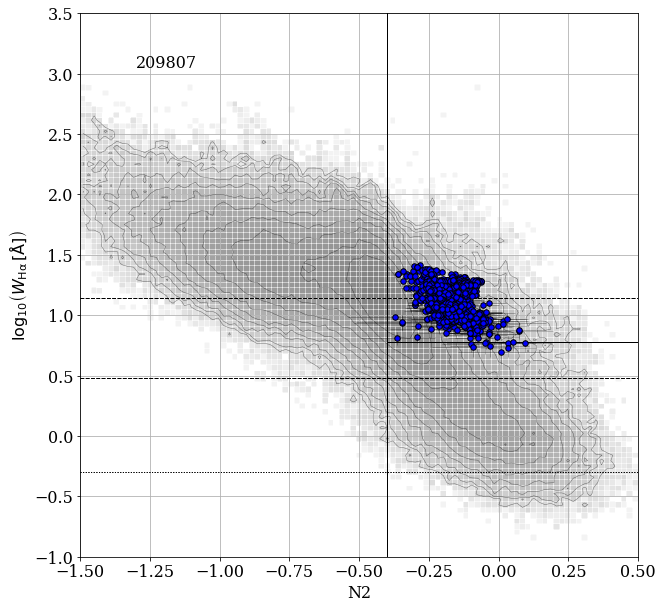

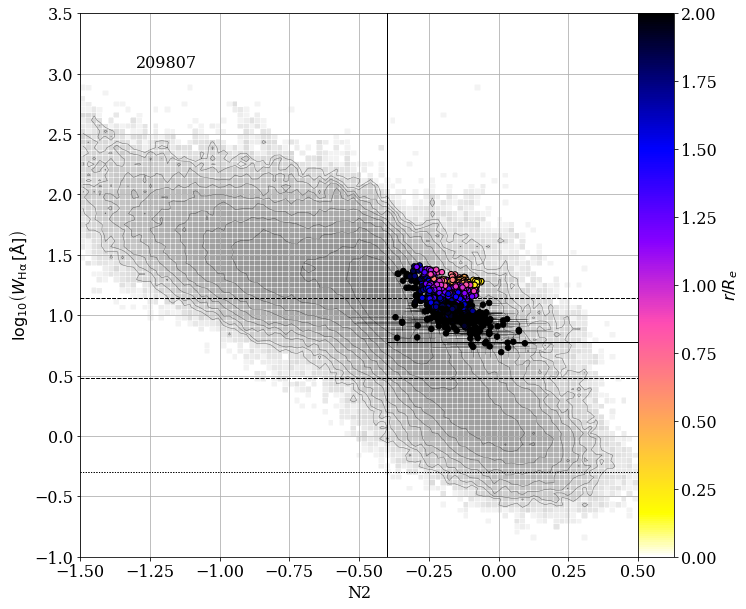

In [21]:
col_y = "log HALPHA EW"
col_x = "log N2"

for col_z in ["Number of components", "r/R_e"]:

    # Create a new figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fig.subplots_adjust(wspace=0)
    if col_z != "Number of components":
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

    # Plot BPT diagram
    ax.text(s=gal, x=0.1, y=0.9, transform=ax.transAxes)
    
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, 
                       col_x=f"{col_x} (total)",
                       col_y=f"{col_y} (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=ax, plot_colorbar=False)

    # Plot LZIFU measurements
    plot2dscatter(df=df_gal_1comp,
                  col_x=f"{col_x} (total)",
                  col_y=f"{col_y} (total)",
                  col_z=None if col_z == "Number of components" else col_z,
                  marker="o", ax=ax, 
                  markersize=30, 
                  markerfacecolor="blue" if col_z == "Number of components" else None, 
                  markeredgecolor="black",
                  cax=cax if col_z != "Number of components" else None,
                  plot_colorbar=True if col_z != "Number of components" else False)

    # axis limits
    ax.set_xlim(
        [np.nanmin([vmin_fn(col_x), df_gal[f"{col_x} (total)"].min() - 0.1]), 
         np.nanmax([vmax_fn(col_x), df_gal[f"{col_x} (total)"].max() + 0.1])])
    # axis limits
    ax.set_ylim(
        [np.nanmin([vmin_fn(col_y), df_gal[f"{col_y} (total)"].min() - 0.1]),
         np.nanmax([vmax_fn(col_y), df_gal[f"{col_y} (total)"].max() + 0.1])])

    # Decorations
    ax.grid()
    ax.collections[0].set_rasterized(True)


## $\sigma_{\rm gas}$ vs. forbidden line ratios
----

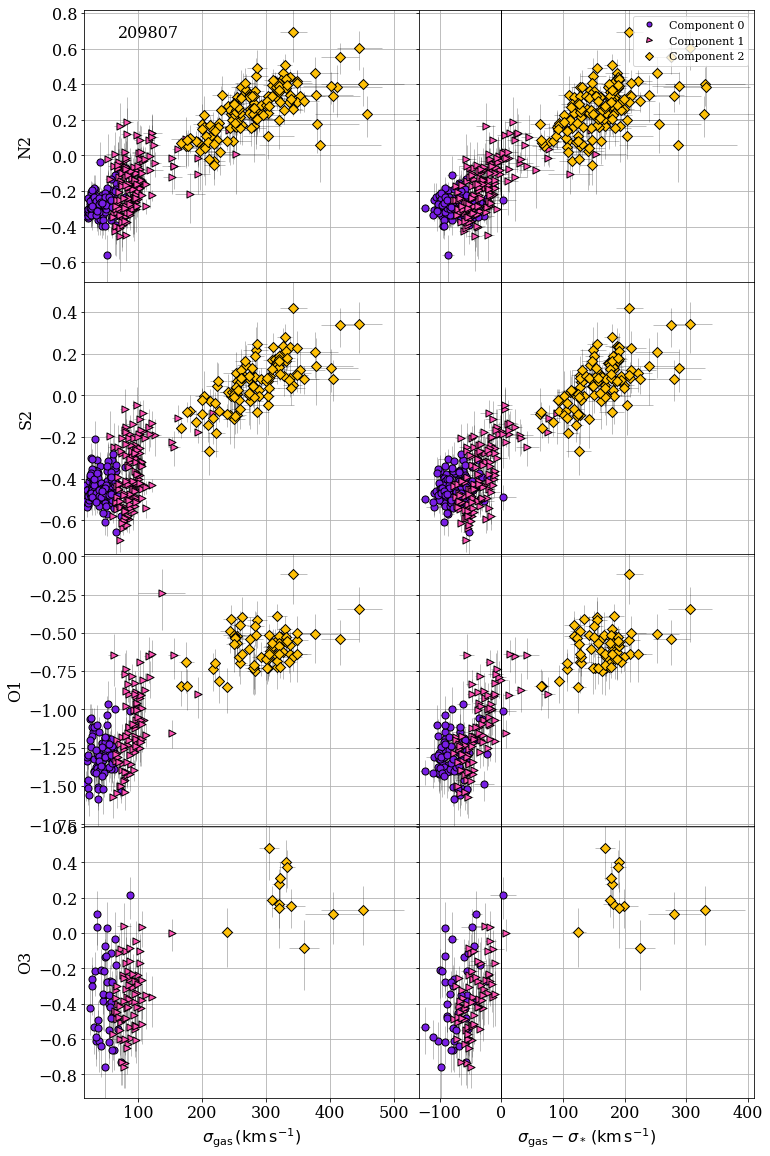

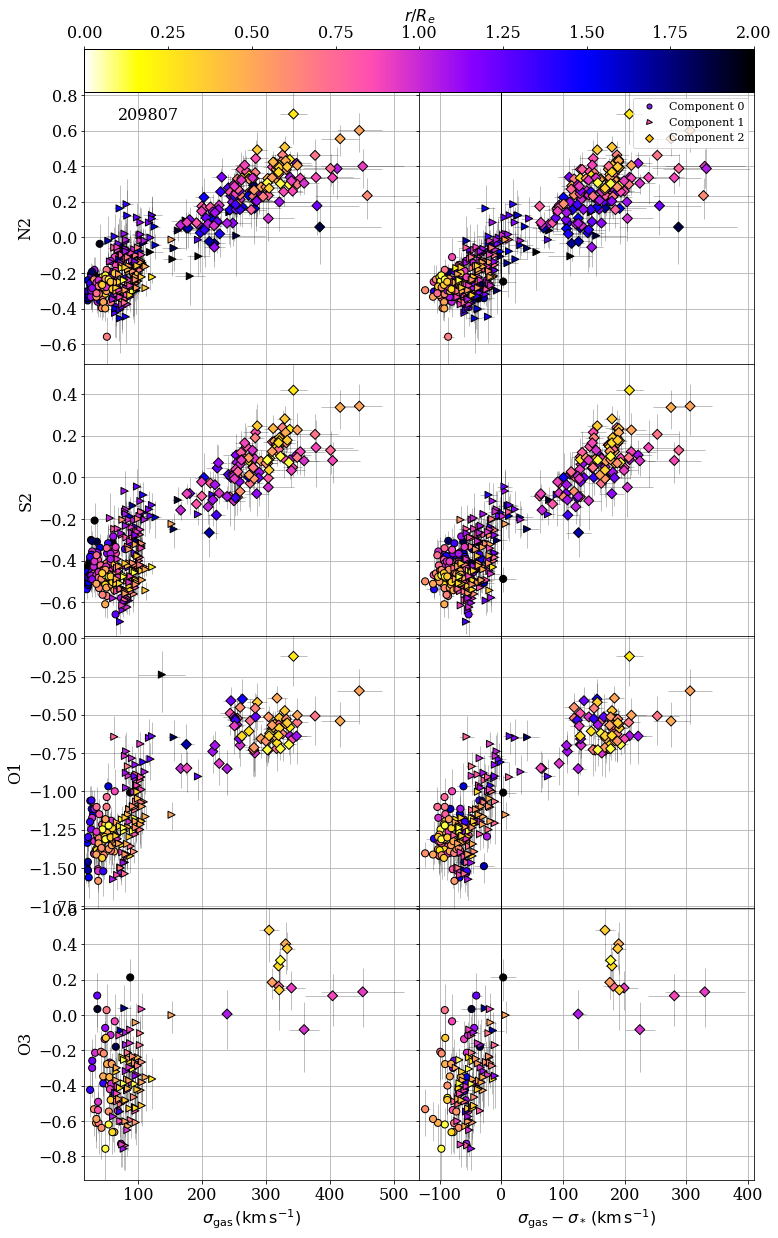

In [29]:
col_y_list = ["log N2", "log S2", "log O1", "log O3"]
col_z_list = ["Number of components", "r/R_e"]

for col_z in col_z_list:
    # Create the figure
    fig, axs = plt.subplots(nrows=len(col_y_list), ncols=2, figsize=(12, 5 * len(col_y_list)), sharex="col", sharey="row")
    fig.subplots_adjust(wspace=0, hspace=0)
    if col_z != "Number of components":
        bbox = axs[0][0].get_position()
        cax = fig.add_axes([bbox.x0, bbox.y0 + bbox.height, 2 * bbox.width, 0.03])

    # log N2, S2, O1 vs. velocity dispersion
    axs[0][0].text(s=gal, x=0.1, y=0.9, transform=axs[0][0].transAxes)
    for rr, col_y in enumerate(col_y_list):
        for ii in range(3):
            plot2dscatter(df=df_gal, 
                          col_x=f"sigma_gas (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=None if col_z == "Number of components" else col_z,
                          markersize=50, marker=markers[ii], 
                          markerfacecolor=component_colours[ii],
                          markeredgecolor="black",
                          ax=axs[rr][0], plot_colorbar=False)
            plot2dscatter(df=df_gal, 
                          col_x=f"sigma_gas - sigma_* (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=None if col_z == "Number of components" else col_z,
                          markersize=50, marker=markers[ii], 
                          markerfacecolor=component_colours[ii],
                          markeredgecolor="black",
                          ax=axs[rr][1], plot_colorbar=True if ii == 2 and col_z != "Number of components" else False, cax_orientation="horizontal",
                          cax=cax if col_z != "Number of components" else None) 
            axs[rr][1].set_ylabel("")
            
    # Decorations
    [ax.autoscale(axis="x", tight=True, enable=True) for ax in axs.flat]
    [ax.autoscale(axis="y", tight=True, enable=True) for ax in axs.flat]
    [ax.grid() for ax in axs.flat]
    
    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    axs[0][1].legend(handles=legend_elements, fontsize="x-small", loc="upper right")



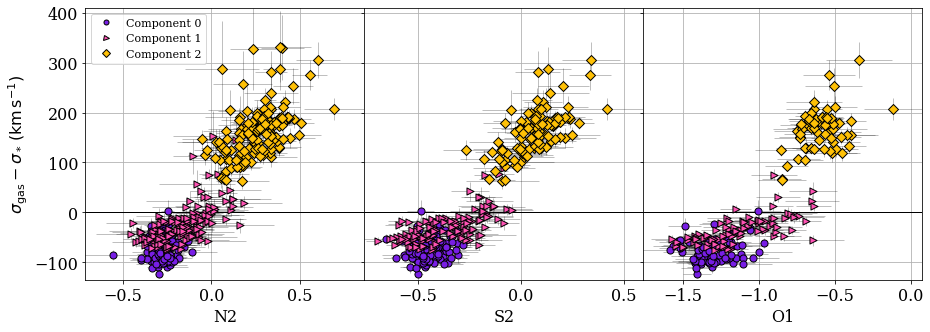

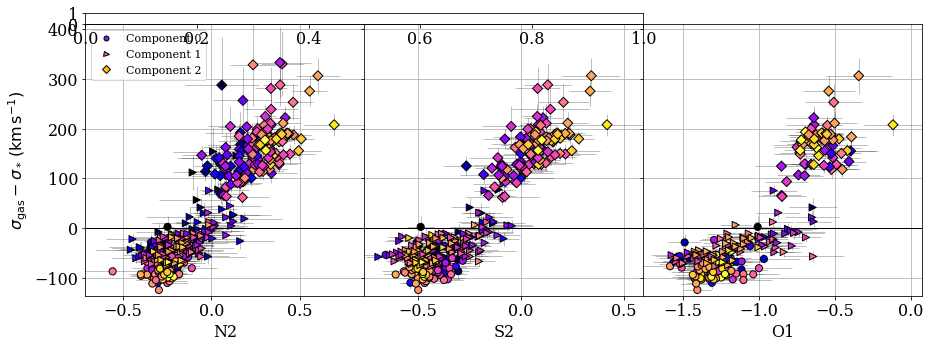

In [43]:
col_y_list = ["log N2", "log S2", "log O1"]
col_z_list = ["Number of components", "r/R_e"]

for col_z in col_z_list:
    # Create the figure
    fig, axs = plt.subplots(ncols=len(col_y_list), nrows=1, figsize=(5 * len(col_y_list), 5), sharey=True)
    fig.subplots_adjust(wspace=0, hspace=0)
    if col_z != "Number of components":
        bbox = axs[0].get_position()
        cax = fig.add_axes([bbox.x0, bbox.y0 + bbox.height, 2 * bbox.width, 0.03])

    # log N2, S2, O1 vs. velocity dispersion
#     axs[0].text(s=gal, x=0.1, y=0.9, transform=axs[0].transAxes)
    for rr, col_y in enumerate(col_y_list):
        for ii in range(3):
            plot2dscatter(df=df_gal, 
                          col_x=f"{col_y} (component {ii})",
                          col_y=f"sigma_gas - sigma_* (component {ii})",
                          col_z=None if col_z == "Number of components" else col_z,
                          markersize=50, marker=markers[ii], 
                          markerfacecolor=component_colours[ii],
                          markeredgecolor="black",
                          ax=axs[rr], plot_colorbar=False)


    # Decorations
    [ax.autoscale(axis="x", tight=True, enable=True) for ax in axs]
    [ax.autoscale(axis="y", tight=True, enable=True) for ax in axs]
    [ax.grid() for ax in axs.flat]
    [ax.set_ylabel("") for ax in axs[1:]]
    
    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    axs[0].legend(handles=legend_elements, fontsize="x-small", loc="upper left")



## Electron density 
---
Because shocks compress gas, a higher $n_e$ is expected in the postshock gas. The ratio of the pre- to post-shock gas densities is given by 
$$ 
\frac{n_{e, \rm \, pre}}{n_{e, \rm \, post}} = \left( \frac{v_{\rm shock}}{c_s} \right)^2
$$
where $c_s$ is the sound speed.

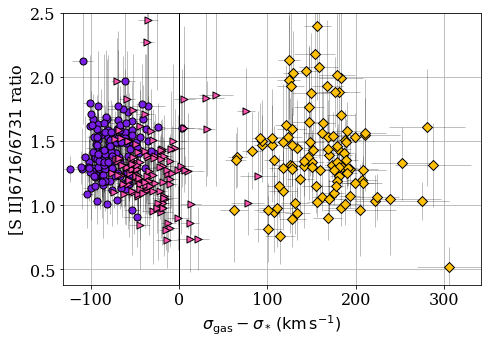

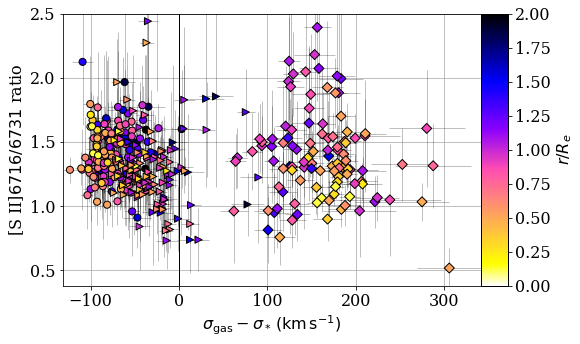

In [39]:
# Plot the electron density vs. the velocity dispersion

col_z_list = ["Number of components", "r/R_e"]

for col_z in col_z_list:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5))
    if col_z != "Number of components":
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

    for ii in range(3):
        plot2dscatter(df=df_gal, 
                      col_x=f"sigma_gas - sigma_* (component {ii})",
                      col_y=f"S2 ratio (component {ii})",
                      col_z=None if col_z == "Number of components" else col_z,
                      ymax=2.5, xmax=1e3,
                      markersize=50, marker=markers[ii],
                      markerfacecolor=component_colours[ii],
                      markeredgecolor="black",
                      ax=ax, 
                      plot_colorbar=True if col_z != "Number of components" else False,
                      cax=cax if col_z != "Number of components" else None)

#     ax.set_xscale("log")
    ax.grid()
    ax.autoscale(axis="x", tight=True, enable=True)


## Comments on the above
---- 
Our BPT and line ratio vs. velocity dispersion diagrams agree well with those presented in Ho et al. (2014). However, despite using the same S/N cut of 3 in the emission line fluxes, they seem to have a larger number of spaxels in their diagrams. 

We also note that there is a strong correlation between the forbidden line ratios and $\Delta \sigma$, suggesting that $\Delta \sigma$ could potentially be used as a shock tracer.

As in Ho et al. (2014), there is no apparent correlation between $\sigma_{\rm gas}$ (or $\Delta \sigma$) and $n_e$.

## WHAV* diagram
---
We now use the WHAV* diagram to investigate whether shocked emission line components occupy a distinct region in the $\Delta-\sigma$, EW parameter space, which in turn will indicate whether the WHAV* diagram can be used to diagnose shocks.

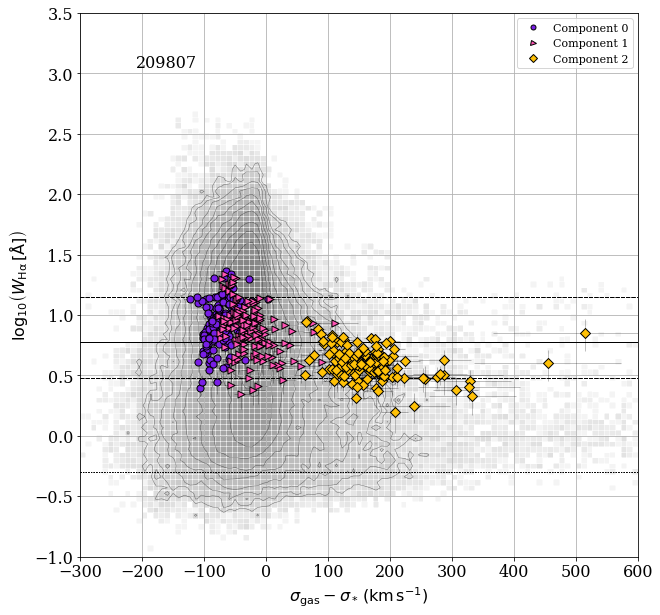

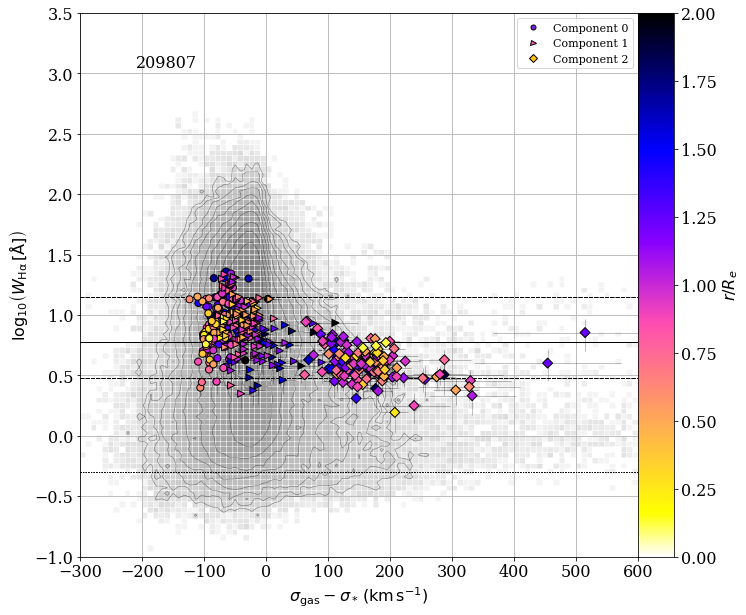

In [41]:
# Single-panel WHAV* diagram
col_y = "log HALPHA EW"
col_x = "sigma_gas - sigma_*"

for col_z in ["Number of components", "r/R_e"]:

    # Create a new figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fig.subplots_adjust(wspace=0)
    if col_z != "Number of components":
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

    # Plot BPT diagram
    ax.text(s=gal, x=0.1, y=0.9, transform=ax.transAxes)
    
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami, 
                       col_x=f"{col_x}",
                       col_y=f"{col_y}", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=ax, plot_colorbar=False)

    # Plot LZIFU measurements
    for ii in range(3):
        plot2dscatter(df=df_gal,
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      col_z=None if col_z == "Number of components" else col_z,
                      marker=markers[ii], ax=ax, 
                      markersize=50, 
                      markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                      markeredgecolor="black",
                      cax=cax if ii == 2 and col_z != "Number of components" else None,
                      plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

    # axis limits
    ax.set_xlim(
        [np.nanmin([vmin_fn(col_x), 
                   np.nanmin([df_gal[f"{col_x} (component 0)"].min(), 
                              df_gal[f"{col_x} (component 1)"].min(), 
                              df_gal[f"{col_x} (component 2)"].min()]) - 0.1]),
         np.nanmax([vmax_fn(col_x), 
                   np.nanmax([df_gal[f"{col_x} (component 0)"].max(), 
                              df_gal[f"{col_x} (component 1)"].max(), 
                              df_gal[f"{col_x} (component 2)"].max()]) + 0.1])])
    # axis limits
    ax.set_ylim(
        [np.nanmin([vmin_fn(col_y), 
                   np.nanmin([df_gal[f"{col_y} (component 0)"].min(), 
                              df_gal[f"{col_y} (component 1)"].min(), 
                              df_gal[f"{col_y} (component 2)"].min()]) - 0.1]),
         np.nanmax([vmax_fn(col_y), 
                   np.nanmax([df_gal[f"{col_y} (component 0)"].max(), 
                              df_gal[f"{col_y} (component 1)"].max(), 
                              df_gal[f"{col_y} (component 2)"].max()]) + 0.1])])

    # Decorations
    ax.grid()
    ax.collections[0].set_rasterized(True)
    
    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    ax.legend(handles=legend_elements, fontsize="x-small", loc="upper right")


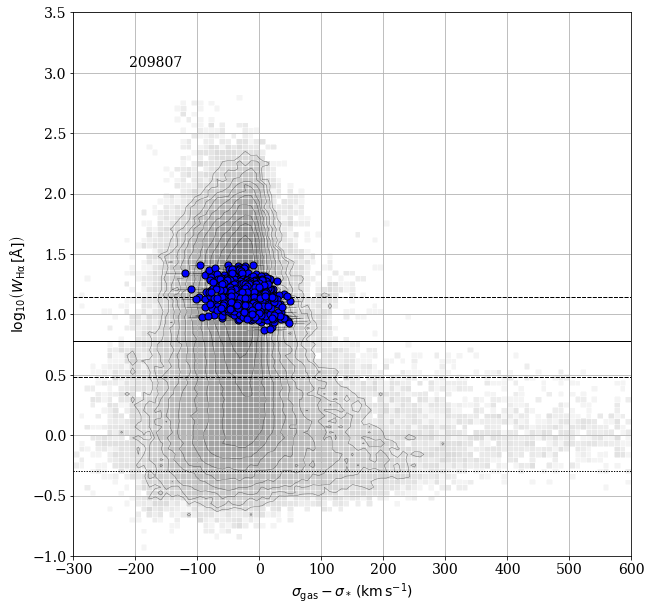

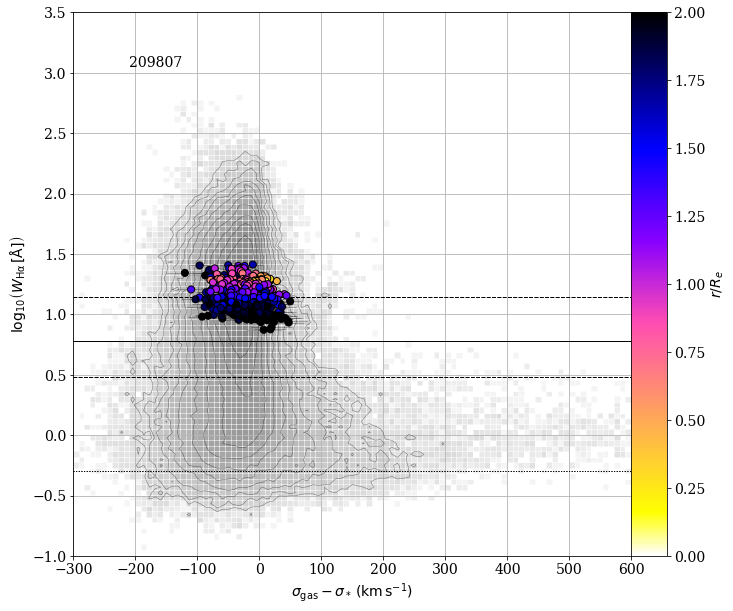

In [71]:
# Single-panel WHAV* diagram (1-component fits)
col_y = "log HALPHA EW"
col_x = "sigma_gas - sigma_*"

for col_z in ["Number of components", "r/R_e"]:

    # Create a new figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fig.subplots_adjust(wspace=0)
    if col_z != "Number of components":
        bbox = ax.get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.05, bbox.height])

    # Plot BPT diagram
    ax.text(s=gal, x=0.1, y=0.9, transform=ax.transAxes)
    
    # Plot full SAMI sample
    plot2dhistcontours(df=df_sami_1comp, 
                       col_x=f"{col_x}",
                       col_y=f"{col_y}", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=ax, plot_colorbar=False)

    # Plot LZIFU measurements
    plot2dscatter(df=df_gal_1comp,
                  col_x=f"{col_x} (component 0)",
                  col_y=f"{col_y} (component 0)",
                  col_z=None if col_z == "Number of components" else col_z,
                  marker="o", ax=ax, 
                  markersize=50, 
                  markerfacecolor="blue" if col_z == "Number of components" else None, 
                  markeredgecolor="black",
                  cax=cax if ii == 2 and col_z != "Number of components" else None,
                  plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

    # axis limits
    ax.set_xlim(
        [np.nanmin([vmin_fn(col_x), df_gal[f"{col_x} (component 0)"].min() - 0.1]), 
         np.nanmax([vmax_fn(col_x), df_gal[f"{col_x} (component 0)"].max() + 0.1])])
    # axis limits
    ax.set_ylim(
        [np.nanmin([vmin_fn(col_y), df_gal[f"{col_y} (component 0)"].min() - 0.1]),
         np.nanmax([vmax_fn(col_y), df_gal[f"{col_y} (component 0)"].max() + 0.1])])

    # Decorations
    ax.grid()
    ax.collections[0].set_rasterized(True)


In [73]:
df_gal["sigma_gas (component 0)"].max()
df_gal["sigma_gas - sigma_* (component 0)"].max()

2.9871999007684735

### Remarks
---
The narrow component is almost entirely located in the upper-left quadrant in the WHAN diagram, which is consistent with this component representing H II regions with low velocity dispersions and moderate to high EWs. 
The broad component, on the other hand, forms a long tail extending to very large values of $\Delta \sigma$.
Meanwhile, the intermediate component appears to form a bridge between the two.

We note that while a significant portion of these broad components have EWs lying *below* the 3 Å HOLMES-DIG line, the *total* EWs in all spaxels is well above this threshold. This shows that, when viewed in front of a stellar continuum, shocks can produce low-to-intermediate H$\alpha$ EWs. This is consistent with the findings of Lacerda et al. (2017), who noted total EWs of 3-12 Å in the edge-on disk galaxy CALIFA 0811 in the shocked regions. 

**We conclude that individual shocked emission line components can exhibit a range of EWs**, which comes as no surpise: unlike emission arising from HOLMES or star-forming regions, the emission from shocks should be independent of the strength of the stellar continuum, and so we should not expect shocks to produce any specific range of EWs.
However - although individual shocked emission line components can have EWs below the HOLMES $\sim 1$ Å limit (as is the case in 209807), the *total* EW within any spaxel with shocks should exceed this limit: simply because, if there is enough gas to produce visible H$\alpha$ emission in the shocks, then there should also be a contribution from ionisation by the stellar continuum, which at minimum should produce EWs of $1 - 3$ Å in most low-$z$ galaxies (e.g., see Section 4.1 and Fig. 2 of Cid Fernandes et al. (2011)). 

**We note that a total EW of less than 3 Å does not indicate that HOLMES must be the only (or even the dominant) ionisation source**. As discussed by Cid Fernandes et al. (2011), it is possible for HOLMES to produce an EW of 1 Å alongisde a low-luminosity AGN contributing an EW of 1 Å, yielding a total EW of 2 Å -- still below the limit of 3 Å. In this case, we should expect to see a rise in EW towards the nucleus.
Additionally, as shown in their fig. 2, a SSP produces EWs < 1 Å between the ages of approximately 100 Myr - 10 Gyr.

**Comparison with 1-component data**: when the 1-component data is used, all of the data points lie in a clump at approximately $\Delta \sigma \sim 0$; the long tail extending to large values of  $\Delta \sigma \sim 400 \,\rm km\,s^{-1}$ disappears.

**Comparison with predictions from shock models**: at first glance, there is no trend between H$\alpha$ flux and velocity disperion, as predicted by shock models.

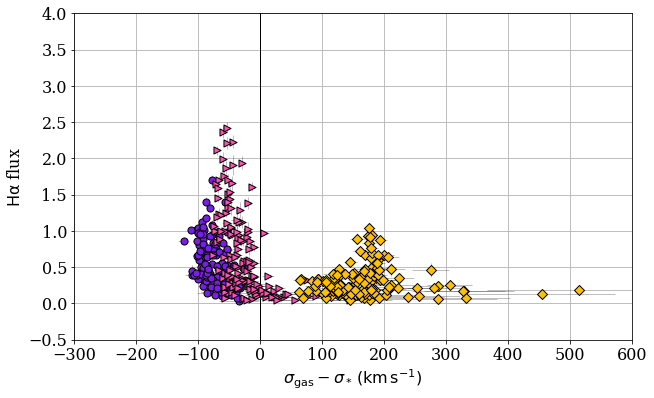

In [48]:
col_x = "sigma_gas - sigma_*"
col_y = "HALPHA"
col_z = "Number of components"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for ii in range(3):
    plot2dscatter(df=df_gal,
                  col_x=f"{col_x} (component {ii})",
                  col_y=f"{col_y} (component {ii})",
                  col_z=None if col_z == "Number of components" else col_z,
                  marker=markers[ii], ax=ax, 
                  markersize=50, 
                  markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                  markeredgecolor="black",
                  cax=cax if ii == 2 and col_z != "Number of components" else None,
                  plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

ax.set_ylim([-0.5, 4])
ax.grid()
